<a href="https://colab.research.google.com/github/pakornsrs/DataSci-miniProjects/blob/main/Titanic_survives_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic_survives_prediction

The Colab is comparison of several classification model of Scikit Learn for classifying who will be survival from the shipwreck.

Reference data : https://www.kaggle.com/c/titanic

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# import data and data processing

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic/train.csv')
df_train.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [ ]:
# Seperate survive as a prediction
y_train = df_train
y_train = y_train.drop(['PassengerId','Name','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 1)
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Drop survive coulmn
df_train = df_train.drop(['Survived'], axis = 1)
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Load test set
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic/test.csv')
df_test.head(-5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [ ]:
# Combine 2 data set together
df_plus = [df_train, df_test]
df = pd.concat(df_plus).reset_index(drop=True)
df.head(-5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [ ]:
df= df.drop('Name', axis = 1)

In [ ]:
df.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
print("Mean of Age = "+str(df.Age.mean()))
print("Mode of Age  = "+str(df.Age.mode()))
print("Median of Age  = "+str(df.Age.median()))

Mean of Age = 29.881137667304014
Mode of Age  = 0    24.0
dtype: float64
Median of Age  = 28.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Age')]

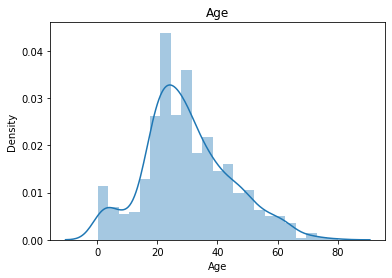

In [ ]:
sns.distplot(df['Age']).set(title='Age')

In [ ]:
df['Age'].fillna(24,inplace=True)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
print("Mean of Fare = "+str(df.Fare.mean()))
print("Mode of Fare  = "+str(df.Fare.mode()))
print("Median of Fare  = "+str(df.Fare.median()))

Mean of Fare = 33.2954792813456
Mode of Fare  = 0    8.05
dtype: float64
Median of Fare  = 14.4542


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Fare')]

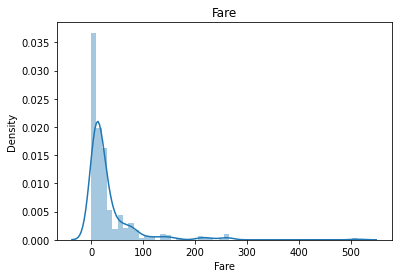

In [ ]:
sns.distplot(df['Fare']).set(title='Fare')

In [ ]:
df['Fare'].fillna(df.Fare.median(),inplace=True)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
n = len(df.Ticket)
for i in range(n):
  try:
    df.Ticket[i] = int(df.Ticket[i])
  except ValueError:
    df.Ticket[i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,0,71.2833,C85,C
2,3,3,female,26.0,0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Mean of Ticket = "+str(df.Ticket.mean()))
print("Mode of Ticket= "+str(df.Ticket.mode()))
print("Median of Ticket = "+str(df.Ticket.median()))

Mean of Ticket = 182070.6294881589
Mode of Ticket= 0    0
dtype: object
Median of Ticket = 29751.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Ticket')]

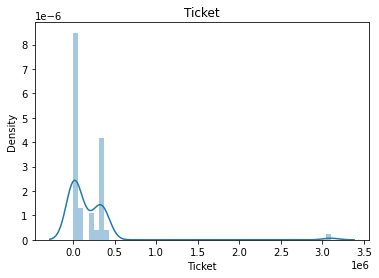

In [ ]:
sns.distplot(df['Ticket']).set(title='Ticket')

In [ ]:
df["Ticket"] = df["Ticket"].replace(0,df.Ticket.median())
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,29751.0,7.2500,NaN,S
1,2,1,female,38.0,1,0,29751.0,71.2833,C85,C
2,3,3,female,26.0,0,0,29751.0,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803.0,53.1000,C123,S
4,5,3,male,35.0,0,0,373450.0,8.0500,NaN,S


In [ ]:
df.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
B96 B98            4
                  ..
B38                1
B82 B84            1
B101               1
A18                1
B50                1
Name: Cabin, Length: 186, dtype: int64

In [ ]:
df['Cabin'].loc[~df['Cabin'].isnull()] = 'Cabin'
df['Cabin'].loc[df['Cabin'].isnull()] = 'No Cabin'
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,29751.0,7.2500,No Cabin,S
1,2,1,female,38.0,1,0,29751.0,71.2833,Cabin,C
2,3,3,female,26.0,0,0,29751.0,7.9250,No Cabin,S
3,4,1,female,35.0,1,0,113803.0,53.1000,Cabin,S
4,5,3,male,35.0,0,0,373450.0,8.0500,No Cabin,S


In [ ]:
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].fillna('S',inplace=True)
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,29751.0,7.2500,No Cabin,S
1,2,1,female,38.0,1,0,29751.0,71.2833,Cabin,C
2,3,3,female,26.0,0,0,29751.0,7.9250,No Cabin,S
3,4,1,female,35.0,1,0,113803.0,53.1000,Cabin,S
4,5,3,male,35.0,0,0,373450.0,8.0500,No Cabin,S


In [ ]:
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   float64
 7   Fare         1309 non-null   float64
 8   Cabin        1309 non-null   object 
 9   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 102.4+ KB


In [ ]:
dummie_Pclass = pd.get_dummies(df['Pclass'])
df = pd.concat([df, dummie_Pclass], axis=1)
df = df.drop('Pclass', axis=1)

dummie_Embarked = pd.get_dummies(df['Embarked'])
df = pd.concat([df, dummie_Embarked], axis=1)
df = df.drop('Embarked', axis=1)

df.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,C,Q,S
0,1,male,22.0,1,0,29751.0,7.2500,No Cabin,0,0,1,0,0,1
1,2,female,38.0,1,0,29751.0,71.2833,Cabin,1,0,0,1,0,0
2,3,female,26.0,0,0,29751.0,7.9250,No Cabin,0,0,1,0,0,1
3,4,female,35.0,1,0,113803.0,53.1000,Cabin,1,0,0,0,0,1
4,5,male,35.0,0,0,373450.0,8.0500,No Cabin,0,0,1,0,0,1


In [ ]:
df = df.replace({'male':0, 'female':1})
df = df.replace({'No Cabin':0, 'Cabin':1})
df.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,C,Q,S
0,1,0,22.0,1,0,29751.0,7.2500,0,0,0,1,0,0,1
1,2,1,38.0,1,0,29751.0,71.2833,1,1,0,0,1,0,0
2,3,1,26.0,0,0,29751.0,7.9250,0,0,0,1,0,0,1
3,4,1,35.0,1,0,113803.0,53.1000,1,1,0,0,0,0,1
4,5,0,35.0,0,0,373450.0,8.0500,0,0,0,1,0,0,1


In [ ]:
df['Age'] = (df['Age']-df['Age'].mean())/df['Age'].std()
df['Ticket'] = (df['Ticket']-df['Ticket'].mean())/df['Ticket'].std()
df['Fare'] = (df['Fare']-df['Fare'].mean())/df['Fare'].std()
df.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,C,Q,S
0,1,0,-0.511527,1,0,-0.410277,-0.503099,0,0,0,1,0,0,1
1,2,1,0.710118,1,0,-0.410277,0.734463,1,1,0,0,1,0,0
2,3,1,-0.206116,0,0,-0.410277,-0.490053,0,0,0,1,0,0,1
3,4,1,0.481059,1,0,-0.195179,0.383037,1,1,0,0,0,0,1
4,5,0,0.481059,0,0,0.469289,-0.487637,0,0,0,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Sex          1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Ticket       1309 non-null   float64
 6   Fare         1309 non-null   float64
 7   Cabin        1309 non-null   int64  
 8   1            1309 non-null   uint8  
 9   2            1309 non-null   uint8  
 10  3            1309 non-null   uint8  
 11  C            1309 non-null   uint8  
 12  Q            1309 non-null   uint8  
 13  S            1309 non-null   uint8  
dtypes: float64(3), int64(5), uint8(6)
memory usage: 89.6 KB


# Indentify train validate and test set

In [ ]:
test_set = df[891:len(df['PassengerId'])]
test_set.head(-5)

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,C,Q,S
891,892,0,0.442883,0,0,0.360426,-0.491905,0,0,0,1,0,1,0
892,893,1,1.397293,1,0,0.443242,-0.507930,0,0,0,1,0,0,1
893,894,0,2.542585,0,0,0.128481,-0.455990,0,0,1,0,0,1,0
894,895,0,-0.129763,0,0,0.320102,-0.475800,0,0,0,1,0,0,1
895,896,1,-0.511527,1,1,7.450173,-0.405740,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,1,-0.358821,0,0,0.370673,-0.494000,0,0,0,1,0,1,0
1300,1301,1,-1.962230,1,1,-0.410277,-0.376991,0,0,0,1,0,0,1
1301,1302,1,-0.358821,0,0,0.448271,-0.493435,0,0,0,1,0,1,0
1302,1303,1,0.633765,1,0,-0.435416,1.096198,1,1,0,0,0,1,0


In [ ]:
data_set = df[0:891]
data_set.head(-5)

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,C,Q,S
0,1,0,-0.511527,1,0,-0.410277,-0.503099,0,0,0,1,0,0,1
1,2,1,0.710118,1,0,-0.410277,0.734463,1,1,0,0,1,0,0
2,3,1,-0.206116,0,0,-0.410277,-0.490053,0,0,0,1,0,0,1
3,4,1,0.481059,1,0,-0.195179,0.383037,1,1,0,0,0,0,1
4,5,0,0.481059,0,0,0.469289,-0.487637,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,0.328354,0,0,0.407376,-0.490618,0,0,0,1,0,0,1
882,883,1,-0.511527,0,0,-0.467087,-0.439964,0,0,0,1,0,0,1
883,884,0,-0.053410,0,0,-0.410277,-0.440287,0,0,1,0,0,0,1
884,885,0,-0.282469,0,0,-0.410277,-0.506964,0,0,0,1,0,0,1


In [ ]:
data_set = pd.concat([data_set, y_train], axis=1)
data_set.head(-5)

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,C,Q,S,Survived
0,1,0,-0.511527,1,0,-0.410277,-0.503099,0,0,0,1,0,0,1,0
1,2,1,0.710118,1,0,-0.410277,0.734463,1,1,0,0,1,0,0,1
2,3,1,-0.206116,0,0,-0.410277,-0.490053,0,0,0,1,0,0,1,1
3,4,1,0.481059,1,0,-0.195179,0.383037,1,1,0,0,0,0,1,1
4,5,0,0.481059,0,0,0.469289,-0.487637,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,0.328354,0,0,0.407376,-0.490618,0,0,0,1,0,0,1,0
882,883,1,-0.511527,0,0,-0.467087,-0.439964,0,0,0,1,0,0,1,0
883,884,0,-0.053410,0,0,-0.410277,-0.440287,0,0,1,0,0,0,1,0
884,885,0,-0.282469,0,0,-0.410277,-0.506964,0,0,0,1,0,0,1,0


In [ ]:
train_set, val_set = train_test_split(data_set, test_size=0.10, random_state=22)
print(len(train_set))
print(len(val_set))
print(len(test_set))

801
90
418


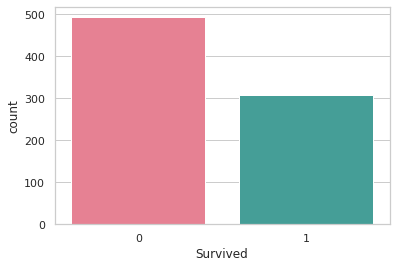

In [ ]:
# Train set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Survived", data = train_set, palette='husl')

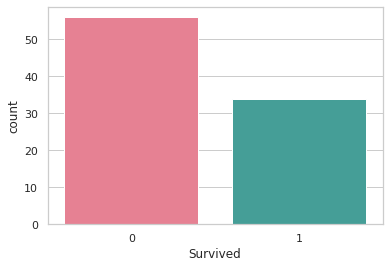

In [ ]:
# Val set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Survived", data = val_set, palette='husl')

In [ ]:
y_train = train_set[['Survived']]
y_val = val_set[['Survived']]
train_set = train_set.drop(['Survived'],axis = 1)
val_set = val_set.drop(['Survived'],axis = 1)

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import tree

In [ ]:
model = GradientBoostingClassifier()
#model = RandomForestClassifier()
#model = AdaBoostClassifier()
#model = NearestCentroid()
#model = tree.DecisionTreeClassifier()

model.fit(train_set, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
feat_imp = pd.DataFrame()
feat_imp['feat_name'] = train_set.columns
feat_imp['score'] = model.feature_importances_
feat_imp.sort_values(by='score', ascending=False)

,feat_name,score
1,Sex,0.449818
5,Ticket,0.116308
10,3,0.101339
6,Fare,0.090316
2,Age,0.085504
0,PassengerId,0.058674
3,SibSp,0.038218
7,Cabin,0.035213
13,S,0.009877
8,1,0.006221


In [ ]:
pred = model.predict(val_set)

In [ ]:
def model_acc(predict,actual):
  con_martix = confusion_matrix(predict,actual)
  TN = con_martix[0][0]
  FN = con_martix[1][0]
  FP = con_martix[0][1]
  TP = con_martix[1][1]
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  return con_martix, Precision, Recall

In [ ]:
con_martix, Precision, Recall = model_acc(pred,y_val)
print("Confusion matrix is ")
print(con_martix)
print("Model precision is "+str(Precision))
print("Model recall is "+str(Recall))

Confusion matrix is 
[[50 12]
 [ 6 22]]
Model precision is 0.6470588235294118
Model recall is 0.7857142857142857


In [ ]:
test_pred = model.predict(test_set)
test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from google.colab import files

In [ ]:
pd.DataFrame(test_pred).to_csv('testans.csv')

In [ ]:
!cp testans.csv "drive/My Drive/"

### Summary 
GradientBoostingClassifier()
*   Precision =  0.6470
*   Recall = 0.7871

GradientBoostingClassifier()
*   Precision =  0.6177
*   Recall = 0.7500

AdaBoostClassifier()
*   Precision =  0.6765
*   Recall = 0.6389

earestCentroid()
*   Precision =  0.4412
*   Recall = 0.3192

DecisionTreeClassifier()
*   Precision =  0.6471
*   Recall = 0.6667



# Deep Neural Network using TensorFlow

In [ ]:
import tensorflow as tf

In [ ]:
ann = 0
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
#Output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(train_set, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.6155
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.6155
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6155
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.6155
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.6155
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.6155
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.6155
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6155
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.6155
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6155


# Summary

The best model for this data set is GradientBoostingClassifier() buildin function of Scikit-Learn
